# WEEK 6
# Breast Cancer Dataset

# **METADATA**
---
1. ID number
2. Diagnosis (M = malignant, B = benign)
3. Radius (mean of distances from center to points on the perimeter)
4.  Texture (standard deviation of gray-scale values)
5. Perimeter
6. Area
7. Smoothness (local variation in radius lengths)
8. Compactness (perimeter^2 / area - 1.0)
9. Concavity (severity of concave portions of the contour)
10. Concave points (number of concave portions of the contour)
11. Symmetry
12. Fractal dimension ("coastline approximation" - 1)

Column 3 until 12 are showing the mean of the column <br>
Column 13 until 20 are showing the standard error of the column <br>
Column 21 until 32 are showing the worst of the column


## Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/data.csv')
df.sample(n=10)

# pd.read_csv digunakan untuk read file dengan format csv
# sample(n=10) digunakan untuk menampilkan data random dari dataset sebanyak 10 row

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
247,884626,B,12.89,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.039800,...,17.70,105.00,639.1,0.1254,0.58490,0.772700,0.156100,0.2639,0.11780,NaN
437,909220,B,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.029440,...,21.58,101.20,750.0,0.1195,0.12520,0.111700,0.074530,0.2725,0.07234,NaN
141,869104,M,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.059430,...,25.27,129.00,1233.0,0.1314,0.22360,0.280200,0.121600,0.2792,0.08158,NaN
508,915452,B,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.045630,...,17.76,109.80,928.2,0.1354,0.13610,0.194700,0.135700,0.2300,0.07230,NaN
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.073640,...,37.13,124.10,943.2,0.1678,0.65770,0.702600,0.171200,0.4218,0.13410,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,...,34.12,126.70,1124.0,0.1139,0.30940,0.340300,0.141800,0.2218,0.07820,NaN
452,9111843,B,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.019450,...,37.88,85.07,523.7,0.1208,0.18560,0.181100,0.071160,0.2447,0.08194,NaN
285,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,...,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431,NaN
534,919537,B,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.027880,...,26.51,76.43,407.5,0.1428,0.25100,0.212300,0.098610,0.2289,0.08278,NaN
425,907367,B,10.03,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,...,28.94,69.92,376.3,0.1126,0.07094,0.012350,0.025790,0.2349,0.08061,NaN


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [66]:
df.info()
# info() digunakan untuk menunjukkan berapa jumlah data pada dataset serta data typenya dan juga jumlah non-null pada tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

3. Show describe column and conclude what the insight is from that column

In [100]:
df.describe()
# describe digunakan untuk menunjukkan percentile, min, max dan jumlah data
# Hasil describe() menunjukkan variasi dan distribusi data untuk setiap fitur. radius_mean memiliki nilai rata-rata sekitar 14.13 dengan standar deviasi sekitar 3.52, dan radius_worst memiliki nilai rata-rata sekitar 16.27 dengan standar deviasi sekitar 4.83,
# menunjukkan bahwa ukuran radius pada sel kanker memiliki variasi yang cukup signifikan.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


4. Null handling

In [68]:
df.isnull().sum()
# isnull().sum() digunakan untuk menunjukkan data yang kosong (null), dan pada dataset ini tidak ada data yang null

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [69]:
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)
df.isnull().sum()
# melakukan drop pada kolom Unnamed: 32 yang datanya semua kosong, dan juga pada id karena hanya sebagai indikator saja

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


5. Mapping the target data

In [70]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
# melakukan mapping pada diagnosis, M (malignant) menjadi 0 dan B (benign) menjadi 1

## Visualisation

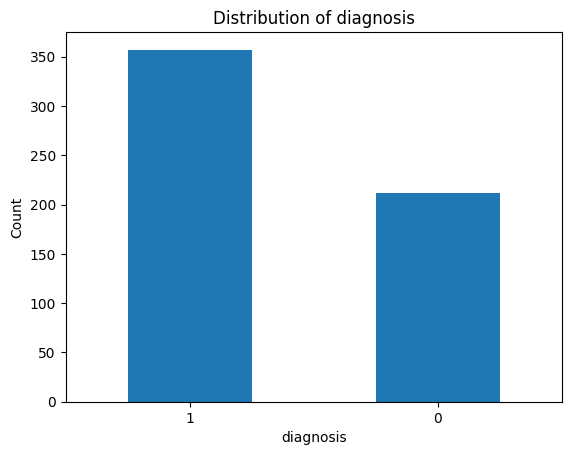

In [71]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Dari grafik yang ditampilkan, pada dataset ini lebih banyak kanker yang bersifat jinak (benign) dariada yang bersifat ganas (malignant)

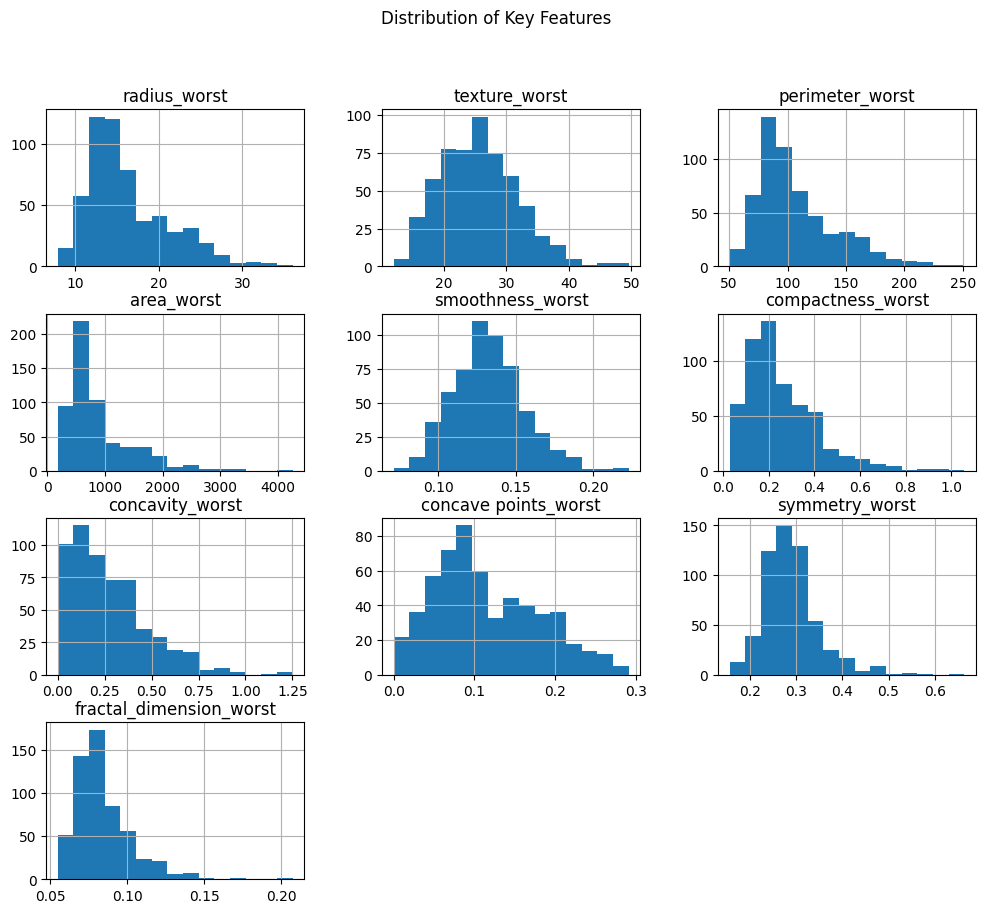

In [72]:
features = df.iloc[:, 21:]
features.hist(bins=15, figsize=(12, 10))
plt.suptitle("Distribution of Key Features")
plt.show()
# Menampilkan distribusi data dari kolom yang worst

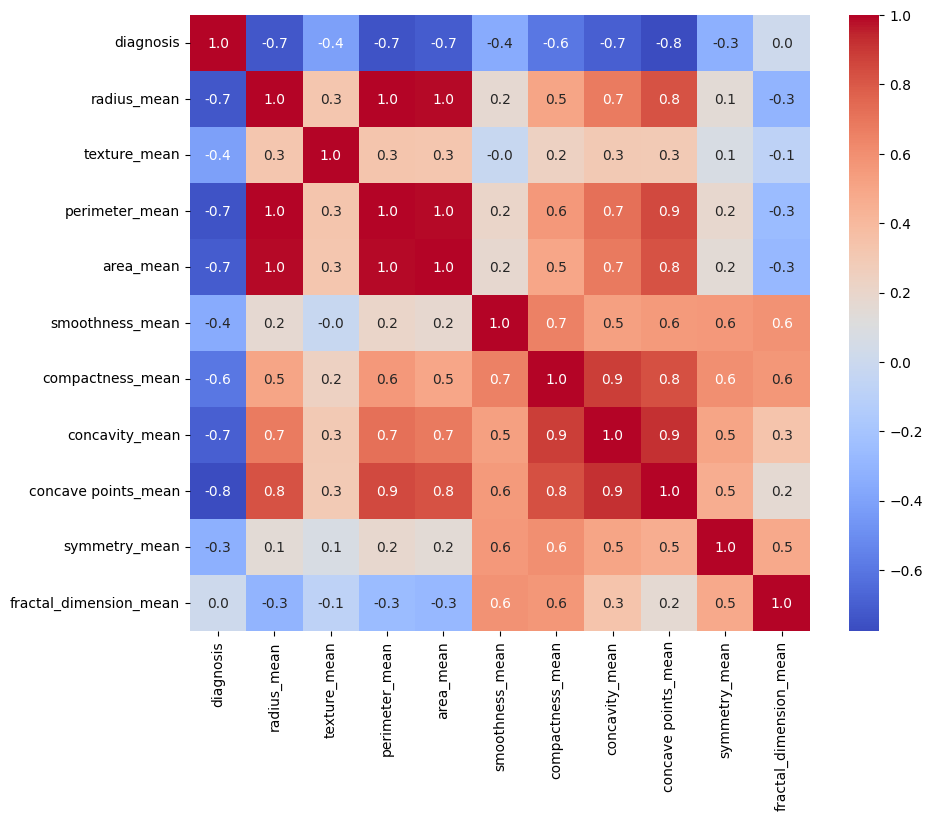

In [73]:
df_selected = df.iloc[:, :11]
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm",fmt='0.1f')
plt.show()
# data yang digunakan merupakan diagnosis (target) dan mean dari data variabel, dan dapat dilihat bahwa perimeter_mean dan area_mean sangat berhubungan dengan radius_mean, dan masih banyak lagi yang berhubungan.

## Machine Learning

1. Splitting X and y

In [74]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
# y merupakan data yang menjadi target, dan X merupakan variabel-variabel yang akan mempengaruhi hasil dari y

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# memisah data menjadi train dan test, train memiliki 80% data dan test sisanya, lalu random state yang dipakai adalah 42

In [76]:
X_train.shape,X_test.shape
# memeriksa dimensi train data dan test data, memastikan bahwa pembagian data sudah sesuai dan data memiliki jumlah fitur yang sama.

((455, 30), (114, 30))

## Desicion Tree

In [77]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state = 0)
dt_entropy.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria entropy, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [78]:
y_pred_entropy = dt_entropy.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_entropy) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_entropy

In [79]:
print(f"Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_entropy)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_entropy

Model accuracy score with criterion entropy: 0.956140350877193


In [80]:
print("Training set score (Entropy): ", dt_entropy.score(X_train, y_train))
print("Test set score (Entropy): ", dt_entropy.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_entropy

Training set score (Entropy):  0.9802197802197802
Test set score (Entropy):  0.956140350877193


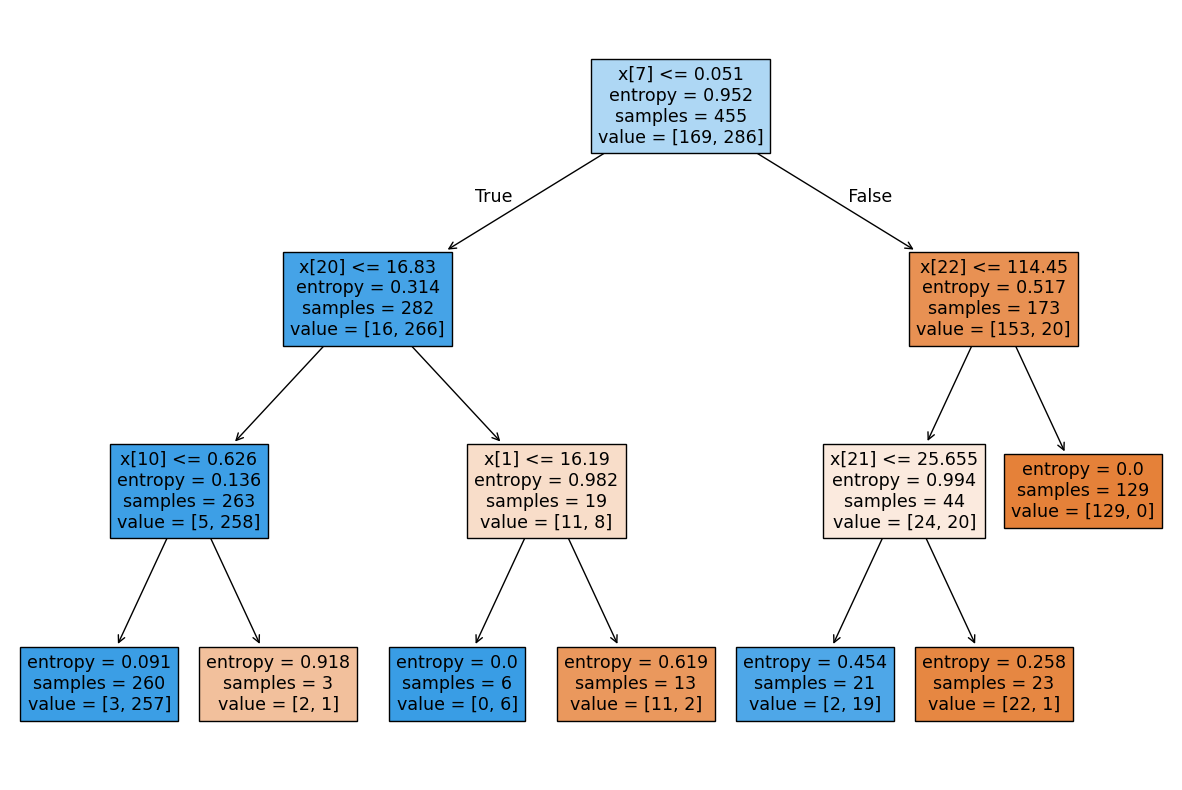

In [81]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_entropy, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_entropy dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [82]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_gini.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria Gini Index, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train

DecisionTreeClassifier(max_depth=3, random_state=0)

In [83]:
y_pred_gini = dt_gini.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_gini) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_gini

In [84]:
print(f"Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_gini

Model accuracy score with criterion gini index: 0.9385964912280702


In [85]:
print("Training set score (Gini Index): ", dt_gini.score(X_train, y_train))
print("Test set score (Gini Index): ", dt_gini.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_gini

Training set score (Gini Index):  0.978021978021978
Test set score (Gini Index):  0.9385964912280702


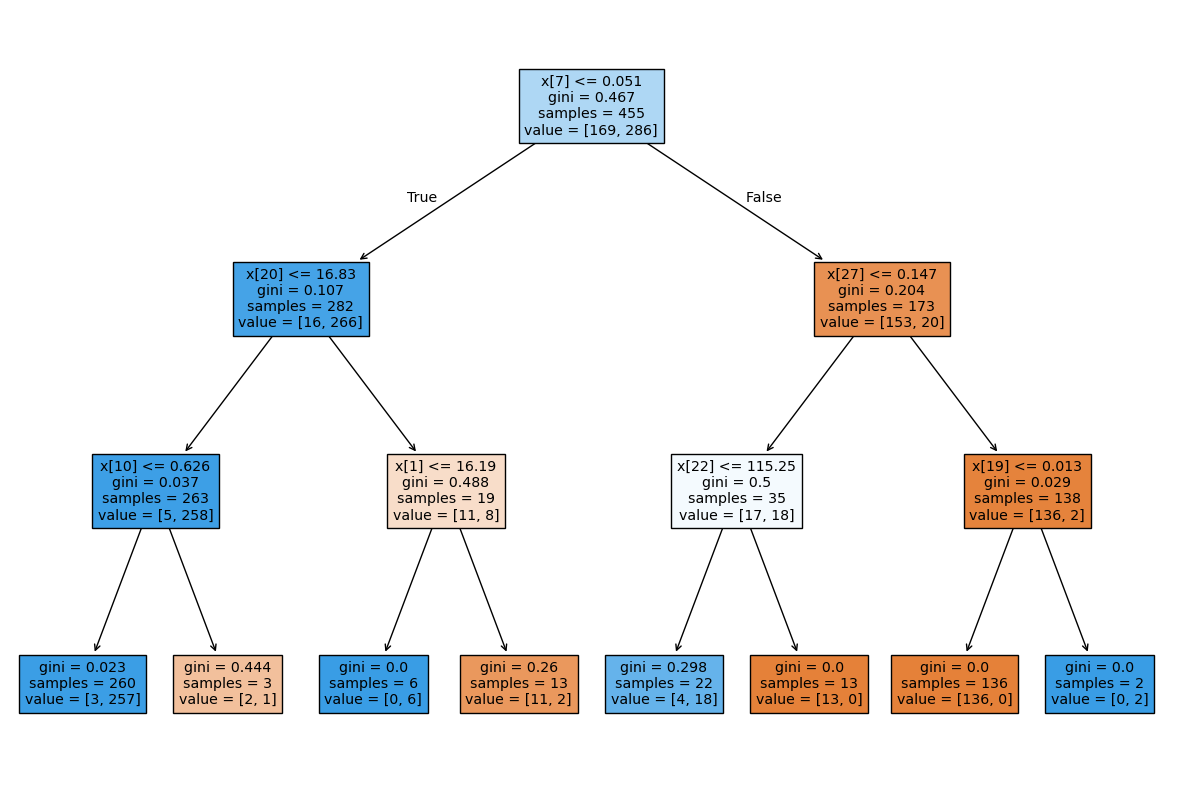

In [86]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_gini dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [87]:
print("Confusion Matrix Entropy\n",confusion_matrix(y_test, y_pred_entropy))
print("Confusion Matrix Gini Index\n",confusion_matrix(y_test, y_pred_gini))
# Code ini akan menampilkan dua confusion matrix, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Confusion Matrix Entropy
 [[39  4]
 [ 1 70]]
Confusion Matrix Gini Index
 [[39  4]
 [ 3 68]]


In [88]:
print("Classification Report Entropy\n",classification_report(y_test, y_pred_entropy))
print("Classification Report Gini Index\n",classification_report(y_test, y_pred_gini))
# Code ini akan menampilkan dua Classification Report, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Classification Report Entropy
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report Gini Index
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [89]:
# Model yang menggunakan kriteria Entropy memiliki akurasi 96%, dengan precision, recall, dan f1-score yang lebih tinggi dibandingkan model Gini Index.
#Confusion Matrix untuk Entropy menunjukkan model ini salah memprediksi 5 sampel, sedangkan Gini Index salah memprediksi 7 sampel.
# Secara keseluruhan, kedua model ini menunjukkan performa yang baik, namun model dengan kriteria Entropy memberikan hasil yang sedikit lebih akurat

## Naive Bayes

In [90]:
nb = GaussianNB()
# Code di atas digunakan untuk membuat model Naive Bayes Gaussian.
nb.fit(X_train, y_train)
# Code di atas digunakan untuk melatih model menggunakan data pelatihan X_train dan y_train.

GaussianNB()

In [91]:
y_pred_nb = nb.predict(X_test)
# Code tersebut menggunakan model Naive Bayes untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_nb

In [92]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_nb))
# Code ini akan menampilkan confusion matrix untuk model Naive Bayes
print("Accuracy Score: ",accuracy_score(y_test, y_pred_nb))
# Code ini akan menampilkan accuracy score untuk model Naives Bayes

Confusion Matrix
 [[40  3]
 [ 0 71]]
Accuracy Score:  0.9736842105263158


In [93]:
print("Classification Report Naive Bayes\n",classification_report(y_test, y_pred_nb))
# Code ini akan menampilkan Classification report untuk model Naive Bayes

Classification Report Naive Bayes
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [94]:
# Model Naive Bayes ini menunjukkan performa yang sangat baik dengan akurasi keseluruhan sebesar 97.37%. Berdasarkan laporan klasifikasi, precision, recall, dan f1-score untuk kedua kelas (0 dan 1) masing-masing sangat tinggi,
# yaitu mendekati atau mencapai 1.0. Confusion Matrix menunjukkan hanya 3 prediksi salah untuk kelas 0 dan tidak ada prediksi salah untuk kelas 1, yang menegaskan efektivitas model dalam memprediksi hasil yang akurat.

## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
# Code tersebut mengimpor, membuat, dan melatih model Logistic Regression menggunakan data pelatihan untuk memprediksi target.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [96]:
y_pred_log = model.predict(X_test)
# Code tersebut menggunakan model Logistic Regression untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_log

In [97]:
# Displaying the confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_log))
# Code ini akan menampilkan confusion matrix untuk model Logistic Regression
print("Accuracy Score Logistic: ",accuracy_score(y_test, y_pred_log))
# Code ini akan menampilkan accuracy score untuk model Logistic Regression

Confusion Matrix:
 [[39  4]
 [ 1 70]]
Accuracy Score Logistic:  0.956140350877193


In [98]:
print('Classification Report Logistic:\n',classification_report(y_test, y_pred_log))
# Code ini akan menampilkan Classification report untuk model Logistic Regression

Classification Report Logistic:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [99]:
# Model regresi logistik menunjukkan akurasi keseluruhan sebesar 95.61%. Confusion Matrix menunjukkan bahwa model salah memprediksi 4 sampel dari kelas 0 dan 1 sampel dari kelas 1.
# Laporan klasifikasi memperlihatkan precision, recall, dan f1-score yang tinggi untuk kedua kelas, dengan hasil lebih baik pada kelas 1.
# Model ini memiliki performa yang konsisten dan akurat, dengan nilai macro dan weighted average sekitar 0.96.